In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
credCardDat = pd.read_csv("../data/creditcard.csv")

In [3]:
credCardDat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credCardDat.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
credCardDat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credCardDat.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


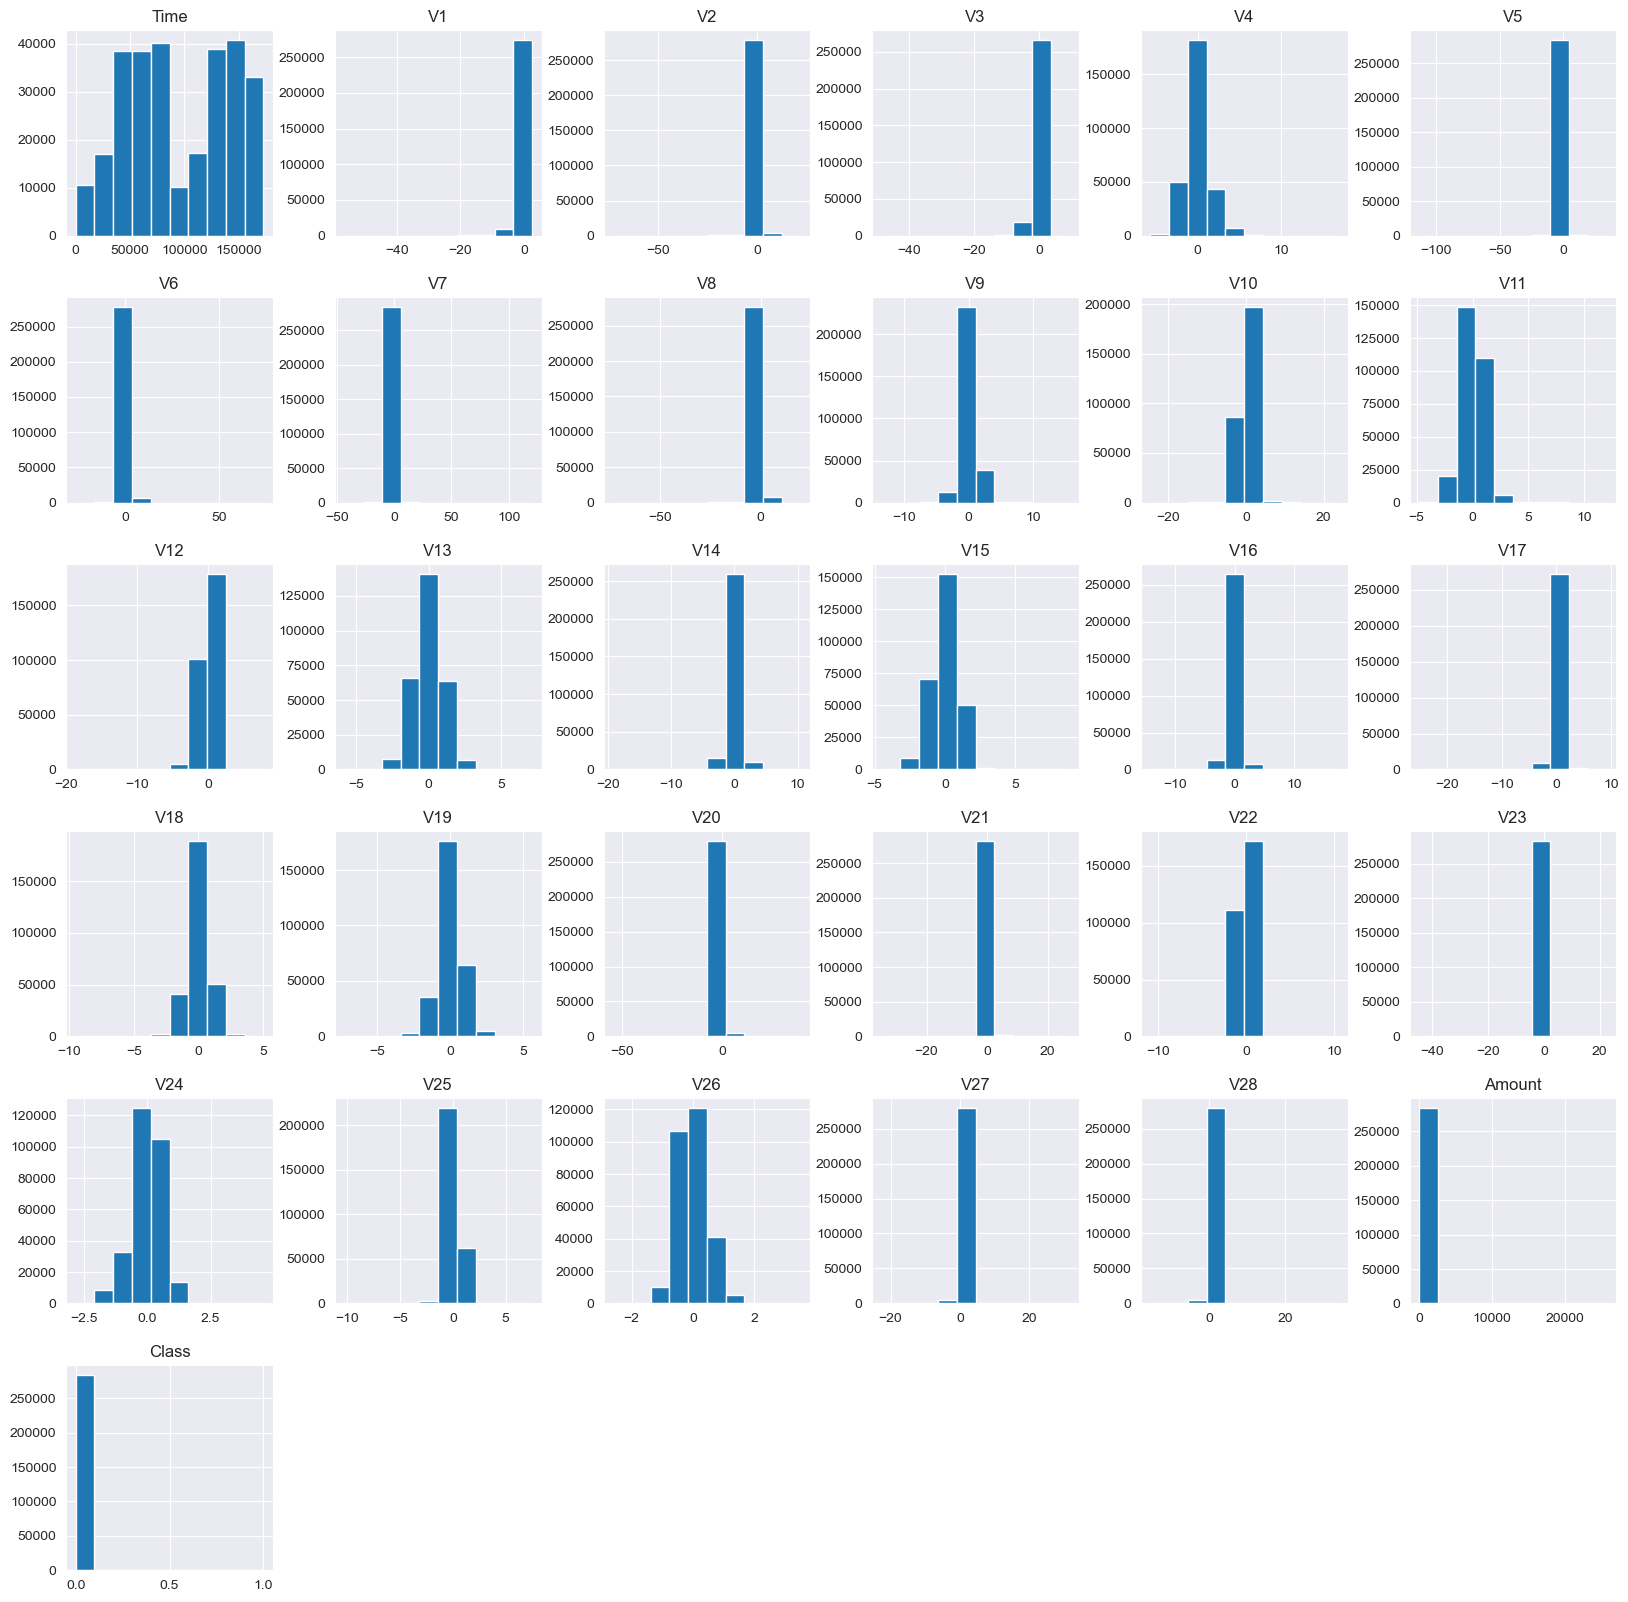

In [7]:
import matplotlib.pyplot as plt

credCardDat.hist(figsize=(20, 20))
plt.show()

In [8]:
credCardDat.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [9]:
classCnt = credCardDat["Class"].value_counts()
classCnt

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
print(credCardDat.groupby("Class")["Class"].count() / credCardDat["Class"].count() * 100)

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


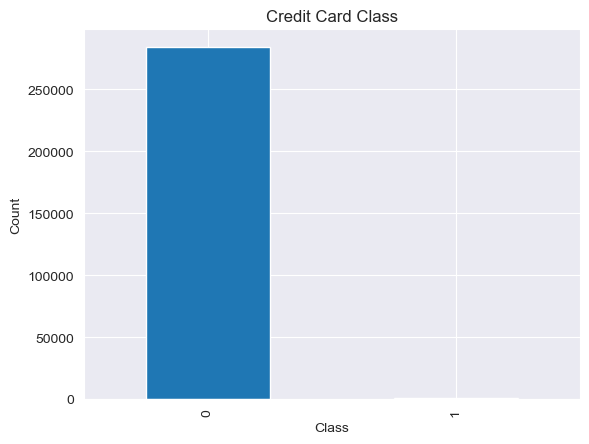

In [11]:
classCnt.plot(kind='bar')
plt.title('Credit Card Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='count'>

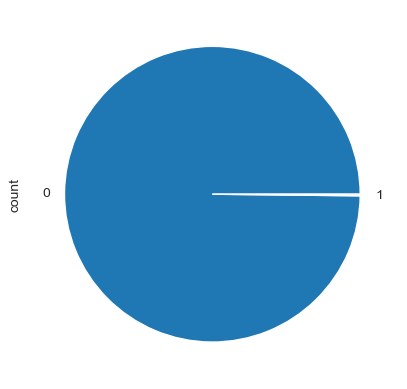

In [12]:
classCnt.plot.pie()

In [13]:
legit = credCardDat[credCardDat["Class"] == 0]
fraud = credCardDat[credCardDat["Class"] == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [14]:
outlierFrac = fraud.shape[0] / float(legit.shape[0])
print(outlierFrac)

0.0017304750013189597


In [15]:
corrMtx = credCardDat.corr()
corrMtx

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<Axes: >

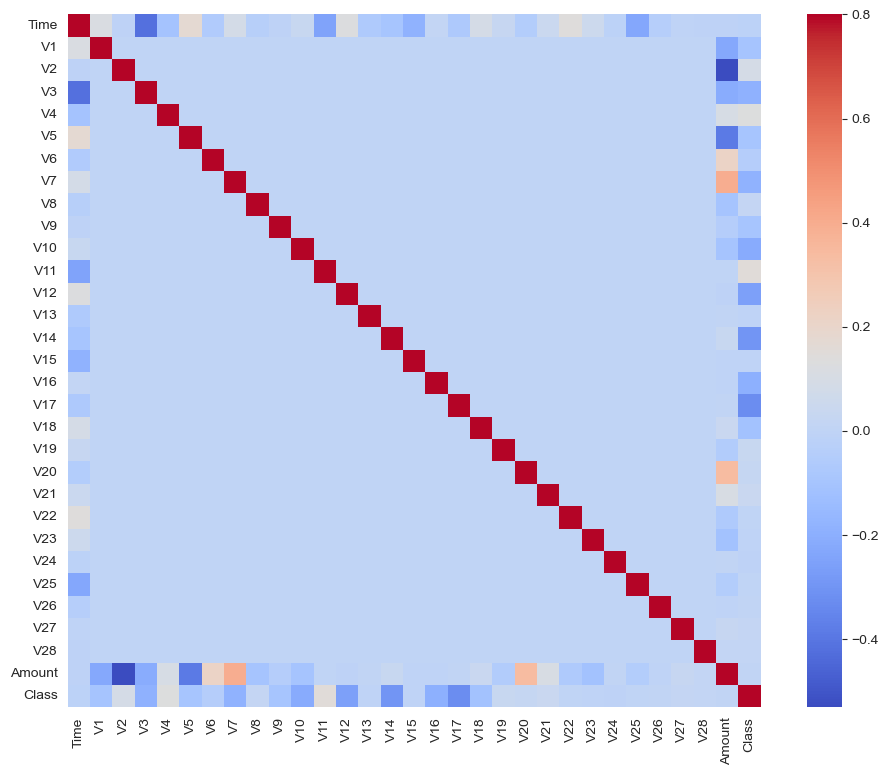

In [16]:
import seaborn as sns

plt.figure(figsize=(12, 9))
sns.heatmap(corrMtx, vmax=0.8, square=True, cmap="coolwarm")

<Axes: >

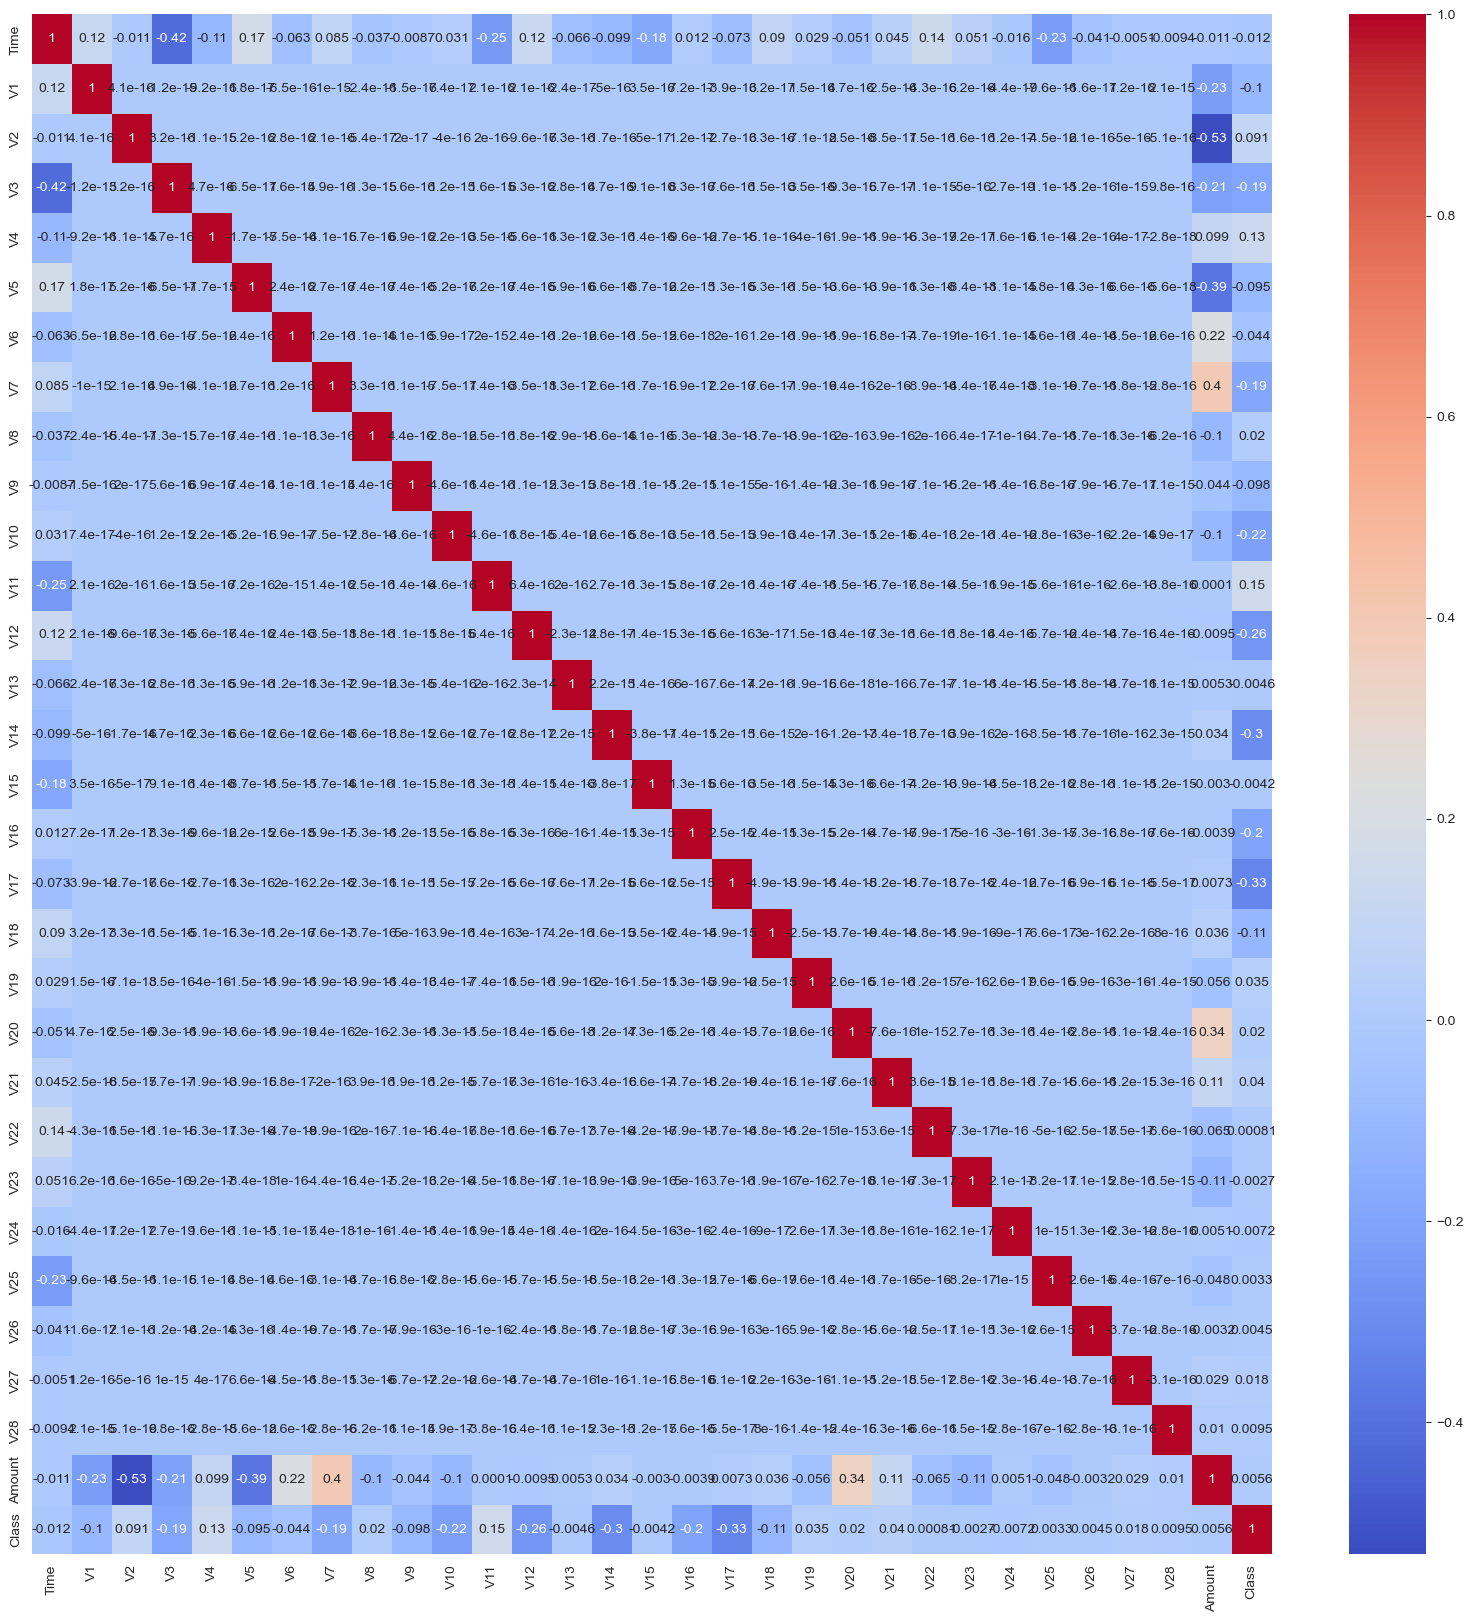

In [17]:
import seaborn as sns

topCorrFeat = corrMtx.index
plt.figure(figsize=(20, 20))
sns.heatmap(credCardDat[topCorrFeat].corr(), annot=True, cmap="coolwarm")

In [18]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

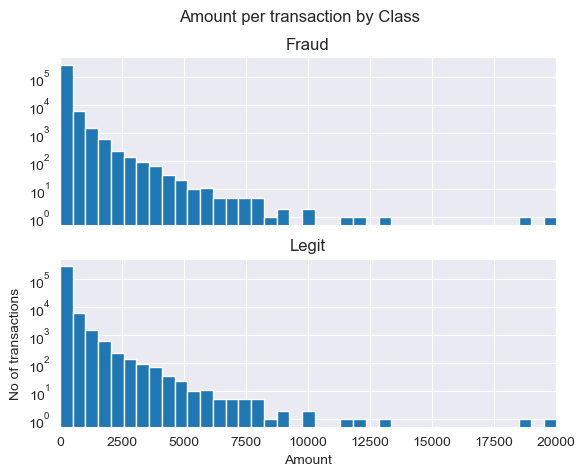

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
fig.suptitle('Amount per transaction by Class')
bins = 50
ax1.hist(credCardDat["Amount"], bins=bins)
ax1.set_title('Fraud')
ax2.hist(credCardDat["Amount"], bins=bins)
ax2.set_title('Legit')
plt.xlabel('Amount')
plt.ylabel('No of transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

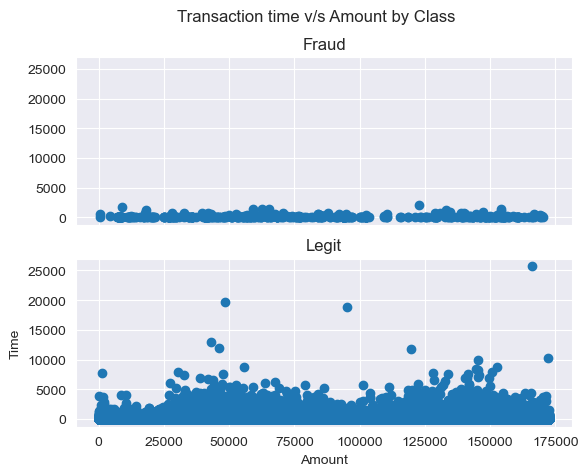

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
fig.suptitle('Transaction time v/s Amount by Class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Legit')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.show()

In [22]:
credCardDat.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [23]:
legit_sample = legit.sample(n=492)

In [24]:
newDatSet = pd.concat([legit_sample, fraud], axis=0)
newDatSet.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
141186,84165.0,1.194684,-0.186350,1.239279,0.775854,-1.133335,-0.339291,-0.657213,0.083594,0.985507,...,-0.101525,-0.100710,0.043167,0.420000,0.224059,0.423988,0.008109,0.024218,4.30,0
52104,45278.0,-1.923089,-1.977794,2.165733,-1.570515,1.070286,-0.984460,-1.444458,0.410183,-1.055808,...,0.593894,0.896981,-0.063041,-0.494846,0.594925,-0.097795,-0.035028,0.085571,49.99,0
195649,131158.0,-0.419111,0.541927,-1.504991,-0.060167,3.547863,3.502551,0.756324,0.813550,-0.804406,...,0.160101,0.490692,-0.081070,0.710671,0.110802,-0.358744,0.427449,0.246735,59.90,0
41347,40644.0,-0.000096,0.424199,1.972867,1.501854,0.272867,1.326000,0.116261,0.144409,0.715647,...,-0.428436,-0.512798,-0.131283,-0.740968,-0.109394,-0.401997,-0.022317,-0.205848,3.99,0
232932,147373.0,2.102372,-1.197421,-0.632337,-0.932112,-1.143515,-0.349231,-1.157690,0.085457,0.117230,...,0.346282,0.936178,0.072403,-0.406423,-0.185114,-0.080764,-0.007377,-0.061077,34.99,0


In [25]:
newDatSet.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [26]:
newDatSet["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [27]:
newDatSet.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95830.750000,0.020666,-0.036995,0.005406,-0.080644,0.072660,0.009977,0.016947,0.017821,-0.105092,...,-0.042599,-0.025666,-0.002930,-0.016866,-0.048848,-0.022649,0.001818,0.009278,-0.024318,79.318618
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [28]:
X = newDatSet.drop("Class", axis=1)
Y = newDatSet["Class"]

In [29]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
141186   84165.0  1.194684 -0.186350  1.239279  0.775854 -1.133335 -0.339291   
52104    45278.0 -1.923089 -1.977794  2.165733 -1.570515  1.070286 -0.984460   
195649  131158.0 -0.419111  0.541927 -1.504991 -0.060167  3.547863  3.502551   
41347    40644.0 -0.000096  0.424199  1.972867  1.501854  0.272867  1.326000   
232932  147373.0  2.102372 -1.197421 -0.632337 -0.932112 -1.143515 -0.349231   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [30]:
print(Y)

141186    0
52104     0
195649    0
41347     0
232932    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(984, 30)
(787, 30)
(197, 30)


In [32]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [33]:
yHat_train = model.predict(X_train)
trainDatAcc = accuracy_score(Y_train, yHat_train)
print("Training data accuracy: ", trainDatAcc)

Training data accuracy:  0.951715374841169


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_train, yHat_train))
print(confusion_matrix(Y_train, yHat_train))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       393
           1       0.98      0.93      0.95       394

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787

[[384   9]
 [ 29 365]]


<Axes: >

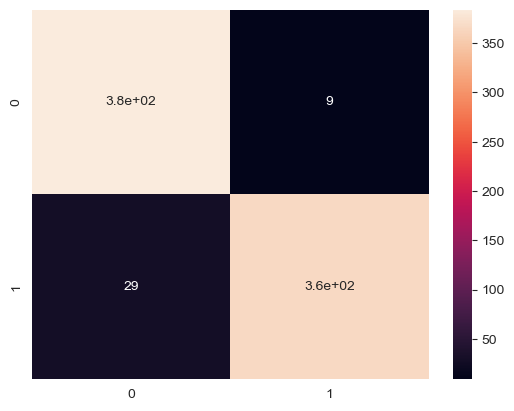

In [35]:
sns.heatmap(confusion_matrix(Y_train, yHat_train), annot=True)

In [36]:
yHat_test = model.predict(X_test)
testDatAcc = accuracy_score(Y_test, yHat_test)
print("Test data accuracy: ", testDatAcc)

Test data accuracy:  0.934010152284264


In [37]:
print(classification_report(Y_test, yHat_test))
print(confusion_matrix(Y_test, yHat_test))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        99
           1       0.97      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

[[96  3]
 [10 88]]


<Axes: >

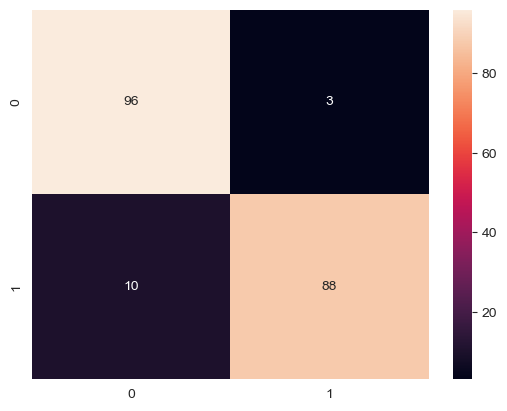

In [38]:
sns.heatmap(confusion_matrix(Y_test, yHat_test), annot=True)

In [39]:
model.coef_

array([[ 1.34958928e-06,  2.14191534e-01, -1.01284450e-01,
         1.48077312e-02,  7.31348630e-01,  1.93928183e-01,
        -4.02376137e-01, -3.99353310e-02, -6.35603859e-01,
        -3.61620344e-01, -7.88299967e-01,  3.69096159e-01,
        -7.36246790e-01, -1.99572548e-01, -1.07650006e+00,
         1.76580621e-02, -2.67367759e-01, -5.70905940e-01,
        -1.63876285e-01,  1.11624448e-01, -5.57770964e-01,
         7.91490806e-02,  3.00023514e-01, -1.10741469e-01,
         3.46075725e-01,  2.81909534e-03, -2.95883958e-01,
        -2.23463168e-01,  6.15088605e-01,  2.53108551e-03]])

In [40]:
import numpy as np

coeff = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(model.coef_))], axis=1)
coeff.columns = ["Feature", "Importance Coefficients"]
coeff

,Feature,Importance Coefficients
0,Time,0.000001
1,V1,0.214192
2,V2,-0.101284
3,V3,0.014808
4,V4,0.731349
5,V5,0.193928
6,V6,-0.402376
7,V7,-0.039935
8,V8,-0.635604
9,V9,-0.361620


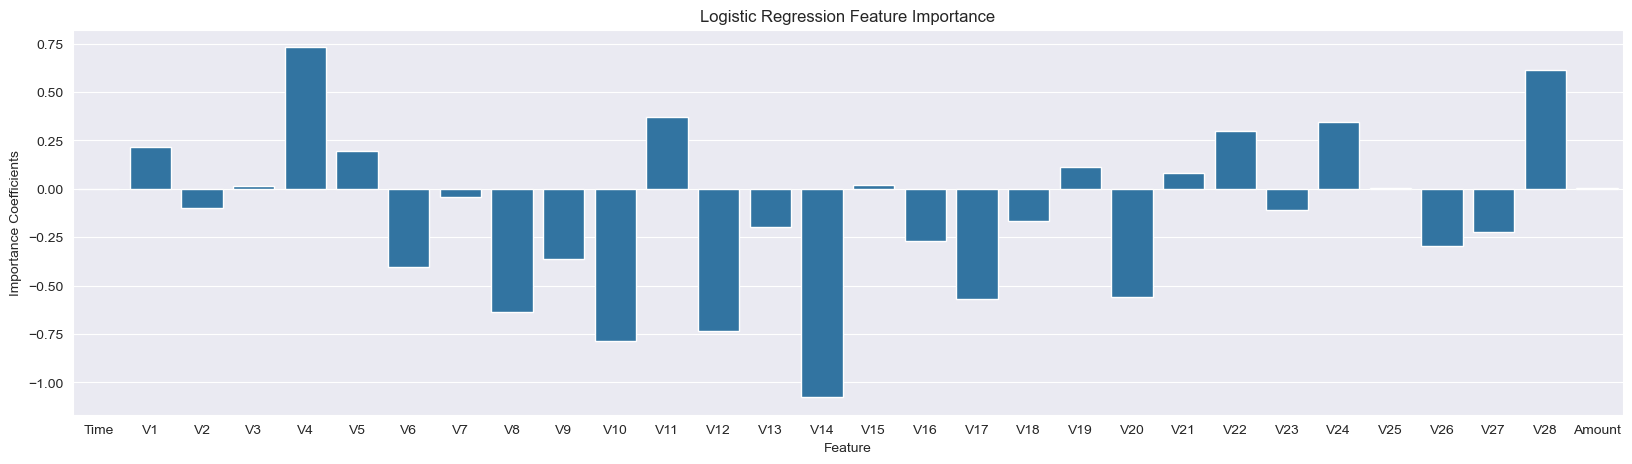

In [46]:
plt.figure(figsize=(20, 5))
sns.barplot(x="Feature", y="Importance Coefficients", data=coeff)
plt.title("Logistic Regression Feature Importance")
plt.show()

In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Ridge Classifier": RidgeClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM (Linear)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf'),
    "Naïve Bayes (Gaussian)": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Neural Network (MLP)": MLPClassifier(max_iter=1000)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, Y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(Y_train, y_train_pred)
    test_acc = accuracy_score(Y_test, y_test_pred)

    print(f"{name} - Training Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}\n")


Training Logistic Regression...
Logistic Regression - Training Accuracy: 0.9517, Test Accuracy: 0.9340

Training Ridge Classifier...
Ridge Classifier - Training Accuracy: 0.9250, Test Accuracy: 0.8934

Training Decision Tree...
Decision Tree - Training Accuracy: 1.0000, Test Accuracy: 0.8883

Training Random Forest...
Random Forest - Training Accuracy: 1.0000, Test Accuracy: 0.9188

Training XGBoost...


C:\Users\KIIT\anaconda3\envs\AP_Lab\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:06:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Training Accuracy: 1.0000, Test Accuracy: 0.9137

Training SVM (Linear)...
SVM (Linear) - Training Accuracy: 0.9072, Test Accuracy: 0.9036

Training SVM (RBF)...
SVM (RBF) - Training Accuracy: 0.5896, Test Accuracy: 0.5838

Training Naïve Bayes (Gaussian)...
Naïve Bayes (Gaussian) - Training Accuracy: 0.8602, Test Accuracy: 0.8731

Training K-Nearest Neighbors...
K-Nearest Neighbors - Training Accuracy: 0.7382, Test Accuracy: 0.6244

Training Neural Network (MLP)...
Neural Network (MLP) - Training Accuracy: 0.6798, Test Accuracy: 0.6954



In [43]:
from sklearn.metrics import classification_report

for name, model in models.items():
    print(f"Classification Report for {name}:\n")
    print(classification_report(Y_test, model.predict(X_test)))
    print("-" * 60)


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        99
           1       0.97      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

------------------------------------------------------------
Classification Report for Ridge Classifier:

              precision    recall  f1-score   support

           0       0.83      0.99      0.90        99
           1       0.99      0.80      0.88        98

    accuracy                           0.89       197
   macro avg       0.91      0.89      0.89       197
weighted avg       0.91      0.89      0.89       197

------------------------------------------------------------
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.90      0.88 

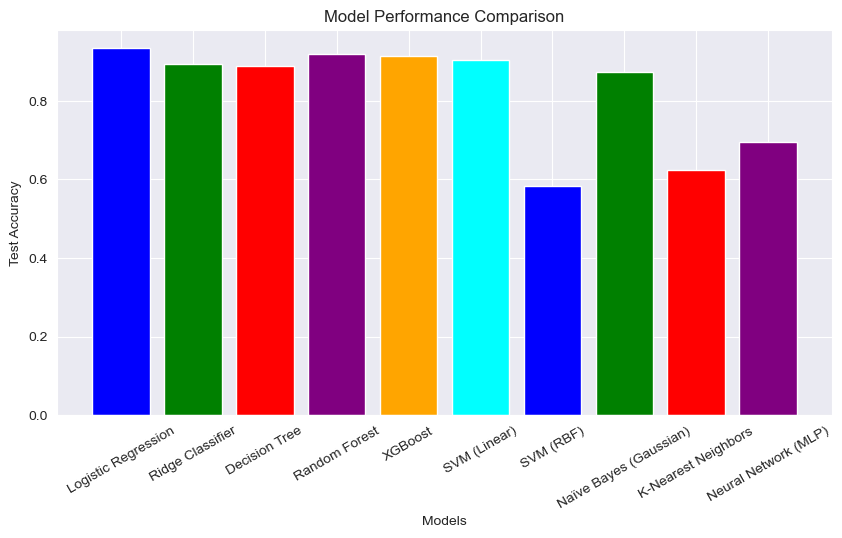

In [44]:
import matplotlib.pyplot as plt

model_names = list(models.keys())
test_accuracies = [accuracy_score(Y_test, model.predict(X_test)) for model in models.values()]

plt.figure(figsize=(10, 5))
plt.bar(model_names, test_accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel("Models")
plt.ylabel("Test Accuracy")
plt.title("Model Performance Comparison")
plt.xticks(rotation=30)
plt.show()
